In [2]:
# Imports
import torch
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
#switching off autograd globally
torch.set_grad_enabled(False)

# 1. Modules

## Baseclass

In [4]:
class Module(object):

    """
    Base class for all modules.
    """

    def forward(self, input_):
        """
        Function to get the input, apply forward pass of module and
        returns a tensor or a tuple of tensors.
        """
        raise NotImplementedError

    def backward(self, gradswrtoutput):
        """
        Function to get input the gradient of the loss with respect to the
        module’s output, accumulate the gradient wrt the parameters, and
        return a tensor or a tuple of tensors containing the gradient of
        the loss wrt the module’s input.
        """
        raise NotImplementedError

    def param(self):
        """
        Returns a list of pairs, each composed of a parameter tensor, and
        a gradient tensor of same size.
        """
        return []

    def zero_grad(self):
        """
        Sets the gradients of a module to 0
        """
        return []

## Activation Functions

### TanH

In [5]:
class TanH(Module):

    """Module to apply the Hyperbolic Tangent function"""

    def __init__(self):

        super().__init__()
        self.name = "TanH"

    def __str__(self):
        return self.name

    def forward(self, input_: torch.Tensor) -> torch.Tensor:
        """Returns the tensor after applying tanh to the input

        Parameters:
            input (Tensor): The tensor on which the tanh should be applied

        Returns:
            Tensor: The tensor obtained after applying the tanh on the input
        """

        self.out_ = input_.tanh()

        return self.out_

    def backward(self, gradwrtoutput: torch.Tensor) -> torch.Tensor:
        """
        Returns the gradient of loss with respect to the input on applying tanh

        Parameters:
            gradientwrtoutput (Tensor): gradient with respect to the output

        Returns:
            Tensor: The gradient of the loss with respect to the input
        """

        return gradwrtoutput * (1 - self.out_.pow(2))

    def param(self):

        return []

### ReLU

In [19]:
class ReLU(Module):

    """Module to apply the Rectified Linear function"""

    def __init__(self):

        super().__init__()
        self.name = "ReLU"

    def __str__(self):
        return self.name

    def forward(self, input_: torch.Tensor) -> torch.Tensor:
        """Returns the tensor after applying ReLU to the input.

        Parameters:
            input (Tensor): The tensor on which the ReLU should be applied

        Returns:
            Tensor: The tensor obtained after applying the ReLU on the input
        """

        self.out = input_.clamp(min=0.0)

        return self.out

    def backward(self, gradwrtoutput: torch.Tensor) -> torch.Tensor:
        """
        Returns the gradient of loss with respect to the input on applying ReLU

        Parameters:
            gradientwrtoutput (Tensor): gradient with respect to the output

        Returns:
            Tensor: The gradient of the loss with respect to the input
        """

        self.out[self.out <= 0] = 0
        self.out[self.out > 0] = 1

        return gradwrtoutput * self.out

    def param(self):

        return []

### Sigmoid

In [34]:
# did not require in the assignment

class Sigmoid(Module):

    """Module to apply the Sigmoid function"""

    def __init__(self):

        super().__init__()
        self.name = "Sigmoid"

    def __str__(self):
        return self.name

    def forward(self, input_: torch.Tensor) -> torch.Tensor:
        """Returns the tensor after applying sigmoid to the input.

        Parameters:
            input (Tensor): The tensor on which the sigmoid should be applied

        Returns:
            Tensor: The tensor obtained after applying the sigmoid on the input
        """

        self.out_ = input_.sigmoid()

        return self.out_

    def backward(self, gradwrtoutput: torch.Tensor) -> torch.Tensor:
        """
        Returns the gradient of loss with respect to the input on applying sigmoid

        Parameters:
            gradientwrtoutput (Tensor): gradient with respect to the output

        Returns:
            Tensor: The gradient of the loss with respect to the input
        """

        return gradwrtoutput * (self.out_ - self.out_**2)

    def param(self):

        return []

## Batch Norm

In [35]:
# # did not require in the assignment

# class BatchNorm(Module):

#     """Module to apply the Batch Normalisation"""

#     def __init__(self, eps: float = 0.000001):
#         """
#         Parameters:
#             eps (float): The epsilon value to add to the denominator to avoid
#             division by zero
#         """

#         super().__init__()
#         self.name = "Batch Norm"
#         self.eps = eps

#         if self.eps < 0:
#             raise ValueError("Epsilon {} should be greater than zero".format(
#                 self.eps))

#     def __str__(self):
#         return self.name

#     def forward(self, input_: torch.Tensor) -> torch.Tensor:
#         """Returns the tensor after applying Batch Norm to the input.

#         Parameters:
#             input_ (Tensor): The tensor on which the Batch Norm should be applied

#         Returns:
#             Tensor: The tensor obtained after applying the Batch Norm on the input
#         """

#         per_component_mean = input_.mean(dim=0)
#         per_component_var = input_.var(dim=0)
#         numer = input_ - per_component_mean
#         denom = torch.sqrt(per_component_var.add(self.eps))
#         self.out_ = numer/denom

#         return self.out_

#     def backward(self, gradwrtoutput: torch.Tensor) -> torch.Tensor:
#         """
#         Returns the gradient of the previous layer as it is

#         Parameters:
#             gradientwrtoutput (Tensor): gradient with respect to the output

#         Returns:
#             Tensor: same as input
#         """

#         return gradwrtoutput

#     def param(self):

#         return []

## Losses

### MSE

In [36]:
class MSELoss(Module):

    """Module to calculate the Mean Squared Error."""

    def __init__(self):
        super().__init__()
        self.name = "MSE Loss"

    def __str__(self):
        return self.name

    def forward(self, output_: torch.Tensor,
                target: torch.Tensor) -> torch.Tensor:
        """Returns the MSE Loss between output_ and target

        Parameters:
            output_ (Tensor): First tensor to calculate the MSE.
            target (Tensor): Second tensor to calculate the MSE.

        Returns:
            Tensor: The Mean Squared Loss between input_ and target
        """

        self.error = output_ - target
        self.loss = self.error.pow(2).mean()

        return self.loss

    def backward(self) -> torch.Tensor:
        """
        gradient of loss

        Returns:
            Tensor: The gradient of Mean Squared Loss between input_ and target
        """

        return (2 * self.error)/self.error.size()[0]

## Optimizer

In [37]:
class Optimizer(object):

    """
    Base class for optimzers.
    """

    def step(self):
        """
         Perform the single optimization step
        """

        raise NotImplementedError

### SGD

In [38]:
class SGD(Optimizer):

    """
    Module to perform Stochastic Gradient Descent
    """

    def __init__(self, params: list, lr=0.01):
        """
        Parameters
            params (list): List of the paramerters of the network
            lr (float): The learning rate of the network
        """

        super().__init__()
        self.name = "SGD"

        self.params = params
        self.lr = lr

        if self.lr <= 0.0:
            raise ValueError(
                "Learning rate {} should be greater than zero".format(self.lr))

    def __str__(self):
        return self.name

    def step(self):
        """
        Function to perform the single optimization step
        """

        for weight, gradient in self.params:
            if (weight is None) or (gradient is None):
                # incase of activation function modules, skip them
                continue
            else:
                weight.add_(-self.lr*gradient)

## Layers

### Linear 

In [39]:
class Linear(Module):

    """
    Module that implements a linear matrix operation layer
    """

    def __init__(self, in_features: int, out_features: int,
                 bias: bool = True, weightsinit: str = "uniform"):
        """
        Initialises the layer by creating empty weight and bias tensors
        and Initialising them using uniform distribution.

        Parameters
            in_features (int): The size of each input sample
            out_features (int): The size of each output sample
            bias – If set to False, the layer will not learn an additive bias. Default: True
            weightsinit (str): The type of weight initialization to use
        """

        super().__init__()
        self.name = "Linear"

        self.in_features = in_features
        self.out_features = out_features
        self.bias = bias
        self.weightsinit = weightsinit

        self.w = torch.empty(self.in_features, self.out_features)
        self.gradw = torch.empty(self.in_features, self.out_features)

        if self.bias:
            self.b = torch.empty(self.out_features)
            self.gradb = torch.empty(self.out_features)
        else:
            self.b = None
            self.gradb = None

        self.initWeights()

    def __str__(self):
        return self.name

    def initWeights(self):
        """
        Initialises the weight and bias parameters of the layer depending on
        the weightinit parameter. Irrespective of the weightinit parameter
        the bias are always zero initialised 

        If "weightsinit" is
            1. uniform (by default), the weights are initiliased using uniform distribution.
            2. xavier, the weights are initiliased using Xavier Initialization.
            3. kaiming, the weights are initiliased using Kaiming Initialization when using ReLU layer
        """

        if self.weightsinit == "uniform":
            k=math.sqrt(1.0/self.in_features)
            self.w.uniform_(-k,k)

        elif self.weightsinit == "xavier":
            self.w.normal_(0,math.sqrt(2/(self.in_features + self.out_features)))

        elif self.weightsinit == "kaiming":
            self.w.normal_(0,math.sqrt(2/(self.in_features)))

        self.gradw.fill_(0)
        
        if self.b is not None:
            self.b.fill_(0)
            self.gradb.fill_(0)

                                       
    def forward(self, input_: torch.Tensor) -> torch.Tensor:
        """
        Computes the forward pass of the layer by multiplying the input with weights and adding the bias
        """

        self.inp = input_

        if self.b is None:
            self.output = self.inp.matmul(self.w)
        else:
            self.output = self.inp.matmul(self.w).add(self.b)

        return self.output

    def backward(self, gradwrtoutput: torch.Tensor) -> torch.Tensor:
        """
        computes the gradient for the weights and biases.
        """

        gradw = self.inp.t().matmul(gradwrtoutput)
        self.gradw.add_(gradw)

        if self.b is not None:
            gradb = gradwrtoutput.sum(0)
            self.gradb.add_(gradb)
        gradient = gradwrtoutput.matmul(self.w.t())

        return gradient

    def param(self) -> list:
        """
        Return the parameters of the layer
        """

        params = [(self.w, self.gradw)]
        if self.b is not None:
            params.append((self.b, self.gradb))

        return params

    def zero_grad(self):
        """
        Sets the gradient to zero
        """

        self.gradw.zero_()

        if self.b is not None:
            self.gradb.zero_()

### Sequential

In [40]:
class Sequential(Module):
    """
    Module to hold the layers and build the Network
    """

    def __init__(self, *args):
        """
        Parameters
            *args (list[Module]): The list of modules to be constructed in the
            network.
        """
        super().__init__()
        self.name = "Sequential"

        # A list to hold all layers of the network
        self.modules = [module for module in args]

    def __str__(self):
        return self.name

    def forward(self, input_: torch.Tensor) -> torch.Tensor:
        """
        Feed Forward prediction of the network. The input is propagated through
        all the layers and the output of the final layer is returned.

        Parameters
            input_ (Tensor): The input sample
        """
        self.inp = input_
        # incase of no layers, the input itself is returned as output
        output = input_

        for module in self.modules:
            output = module.forward(output)

        self.output = output

        return self.output

    def backward(self, gradwrtoutput: torch.Tensor) -> torch.Tensor:
        """
        Backward propagation of the network. The error is propagated through
        all the layers iteratively.

        Parameters
            input_ (Tensor): The input sample
        """
        # The error is propagated in the reverse (backward) direction
        for module in reversed(self.modules):
            gradwrtoutput = module.backward(gradwrtoutput)

#         self.grad = gradwrtoutput

#         return self.grad

    def param(self) -> list:
        """
        List of parameters of all modules

        Returns:
            params (list): List of tuple of weight and bias of each layer in
            the network
        """

        params = []
        for module in self.modules:
            params.extend(module.param())

        return params

    def zero_grad(self):
        """
        Sets the gradient to zero of all modules
        """

        for weight, gradient in self.param():
            if (weight is None) or (gradient is None):
                # incase of activation function modules, skip them
                continue
            else:
                gradient.zero_()

# 2. Data generation

In [41]:
def generate_data(num_points: int) -> [torch.Tensor, torch.Tensor]:
    """
    Function to generate the dataset of 1,000 points sampled uniformly
    in [0, 1]^2, each with a label 0 if outside the disk centered at (0.5; 0.5)
    of radius 1/sqrt(2*pi), and 1 inside.

    Parameters:
        num_points (int): The number of points to be generated

    Returns:
        Tensor : A two dimensional input data with points sampled between [0,1]
        Tensor : A two dimensional output data that contains labels
        corresponding to the input data generated above as one hot encoded variable
    """

    input_ = torch.Tensor(num_points, 2).uniform_(0, 1)

    labels = input_.sub(0.5).pow(2).sum(1).sub(1 / (2 * math.pi)).sign().add(1).div(2).long()

    labels_onehot = torch.empty(num_points, 2).fill_(0)
    labels_onehot[:, 0] = labels == 0
    labels_onehot[:, 1] = labels == 1

    return input_, labels_onehot

# 3. Train Model

In [42]:
def train_model(model: Sequential, train_input: torch.Tensor,
                train_target: torch.Tensor, loss_criteria: Module,
                learning_rate: float, mini_batch_size: int, nb_epochs: int
                ) -> list:
    """
    Function to train a model and return the epoch wise loss as a list.

    Parameters:
        model (Sequential): The neural network model
        train_input (Tensor): The input data samples
        train_target (Tensor): The target of data samples
        loss_criteria (Module): The loss function to use to train the model
        learning_rate (float): The learning rate to be update the weights of
        the model
        mini_batch_size (int): The batch size to train the model
        nb_epochs (int): The number of eppochs to train the network

    Returns:
        losses : A list of loss collected after each epoch of training
    """

    optimizer = SGD(model.param(), lr=learning_rate)
    losses = []
    for epoch_number in range(nb_epochs):
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model.forward(train_input.narrow(0, b, mini_batch_size))
            loss_ = loss_criteria.forward(
                output, train_target.narrow(0, b, mini_batch_size))
            model.zero_grad()
            model.backward(loss_criteria.backward())
            optimizer.step()
        if epoch_number % 100 == 0:
            print("Epoch {} Training loss {}".format(
                epoch_number, loss_.item()))
        losses.append(loss_.item())
    return losses


def compute_nb_errors(model: Sequential, input_: torch.Tensor,
                      target: torch.Tensor) -> int:
    """
    Computes and returns the number of misclassifications by the model

    Parameters:
        model (Sequential): The neural network model
        input_ (Tensor): The input data samples
        target (Tensor): The target of data samples

    Returns
        nb_data_errors (int): The number of misclassifications.

    """

    nb_data_errors = 0

    output = model.forward(input_)

    _, predicted = torch.max(output.data, 1)

    _, actual = torch.max(target.data, 1)

    for k in range(input_.size()[0]):
        if actual.data[k] != predicted[k]:
            nb_data_errors = nb_data_errors + 1
    return nb_data_errors

# 4. Experiments

## Data Generation and Normalization

In [43]:
# generate the training and test samples

train_input, train_target = generate_data(1000)
test_input, test_target = generate_data(500)

# Normalising the train and test data
mu, std = train_input.mean(), train_input.std()
train_input.sub_(mu).div_(std)
test_input.sub_(mu).div_(std)
print()

## Models

We define the models to experiment with various parameters. All models will have a input, output layer and 3 hidden layer with 25 neurons each. The factors that can be used for experiments are: The type of activation, the type of loss, the type of weight initialisation and the usage of batch normalisation.

| **Model Number** | **Activation** | **Loss**      | **Weight Initialisation** |
|:----------------:|:--------------:|:-------------:|:-------------------------:|
| 1                | TanH           | MSE           | Uniform                   |
| 2                | TanH           | MSE           | Xavier                    |
| 3                | ReLU           | MSE           | Uniform                   |
| 4                | ReLU           | MSE           | kaiming                   |



<!-- | **Model Number** | **Activation** | **Loss**      | **Batch Normalisation** | **Weight Initialisation** |
|:----------------:|:--------------:|:-------------:|:-----------------------:|:-------------------------:|
| 1                | TanH           | MSE           | No                      | Uniform                   |
| 2                | TanH           | MSE           | No                      | Xavier                    |
| 3                | TanH           | MSE           | Yes                     | Uniform                   |
| 4                | TanH           | MSE           | Yes                     | Xavier                    |
| 5                | ReLU           | MSE           | No                      | Uniform                   |
| 6                | ReLU           | MSE           | No                      | kaiming                   |
| 7                | ReLU           | MSE           | Yes                     | Uniform                   |
| 8                | ReLU           | MSE           | Yes                     | kaiming                   |
 -->

In [44]:
Model_1 = Sequential(Linear(2, 25), TanH(),
                     Linear(25, 25), TanH(),
                     Linear(25, 25), TanH(),
                     Linear(25, 25), TanH(),
                     Linear(25, 2), Sigmoid())

Model_2 = Sequential(Linear(2, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 2, weightsinit="xavier"), Sigmoid())


Model_3 = Sequential(Linear(2, 25), ReLU(),
                     Linear(25, 25), ReLU(),
                     Linear(25, 25), ReLU(),
                     Linear(25, 25), ReLU(),
                     Linear(25, 2), Sigmoid())

Model_4 = Sequential(Linear(2, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 2, weightsinit="kaiming"), Sigmoid())




In [45]:
mseloss = MSELoss()

In [46]:
models = {
          1: {"model": Model_1, "activation": "TanH", "loss": mseloss,
              "weightint": "Uniform"},
          2: {"model": Model_2, "activation": "TanH", "loss": mseloss,
              "weightint": "Xavier"},
          3: {"model": Model_3, "activation": "ReLU", "loss": mseloss,
              "weightint": "Uniform"},
          4: {"model": Model_4, "activation": "ReLU", "loss": mseloss,
              "weightint": "kaiming"}
}
       

In [23]:
learning_rate = 0.01
nb_epochs = 1000
model_result_attributes = {}
mini_batch_size = 100

for id_num, M in models.items():
    print("Model {} with {} activation, with {} weight initialisation ".format(id_num, M["activation"], M["weightint"], str(M["loss"])))

    model = M["model"]

    model_loss = train_model(model, train_input, train_target, M["loss"],
                             learning_rate, mini_batch_size, nb_epochs)

    nb_train_errors = compute_nb_errors(model, train_input, train_target)
    nb_test_errors = compute_nb_errors(model, test_input, test_target)

    train_accuracy = (100 * (
        train_input.size(0)-nb_train_errors)) / train_input.size(0)

    test_accuracy = (100 * (
        test_input.size(0) - nb_test_errors)) / test_input.size(0)

    train_error = 100 - train_accuracy
    test_error = 100 - test_accuracy

    model_result_attributes[id_num] = {"epoch_loss": model_loss,
                                       "train_accuracy": train_accuracy,
                                       "train_error": test_accuracy,
                                       "test_accuracy": train_error,
                                       "test_error": test_error}

    print(
        'Train Accuracy {:0.2f}% {:d}/{:d}'.format(
            train_accuracy, (train_input.size(0) - nb_train_errors),
            train_input.size(0)))

    print(
        'Test Accuracy {:0.2f}% {:d}/{:d}'.format(
            test_accuracy, (test_input.size(0) - nb_test_errors),
            test_input.size(0)))

    print(
        'Train Error {:0.2f}% {:d}/{:d}'.format(
            train_error, nb_train_errors, train_input.size(0)))

    print('Test Error {:0.2f}% {:d}/{:d}'.format(
        test_error, nb_test_errors, test_input.size(0)))

    print("\n")

Model 1 with TanH activation, with Uniform weight initialisation 
Epoch 0 Training loss 0.25020360946655273
Epoch 100 Training loss 0.25022074580192566
Epoch 200 Training loss 0.25016963481903076
Epoch 300 Training loss 0.24985963106155396
Epoch 400 Training loss 0.24894827604293823
Epoch 500 Training loss 0.2464352250099182
Epoch 600 Training loss 0.2387649416923523
Epoch 700 Training loss 0.20270311832427979
Epoch 800 Training loss 0.08820977061986923
Epoch 900 Training loss 0.04256223142147064
Train Accuracy 99.00% 990/1000
Test Accuracy 99.00% 495/500
Train Error 1.00% 10/1000
Test Error 1.00% 5/500


Model 2 with TanH activation, with Xavier weight initialisation 
Epoch 0 Training loss 0.2508309781551361
Epoch 100 Training loss 0.22959069907665253
Epoch 200 Training loss 0.13917800784111023
Epoch 300 Training loss 0.06871499121189117
Epoch 400 Training loss 0.04102269560098648
Epoch 500 Training loss 0.029681546613574028
Epoch 600 Training loss 0.024128727614879608
Epoch 700 Train

# 4. Plotting Loss

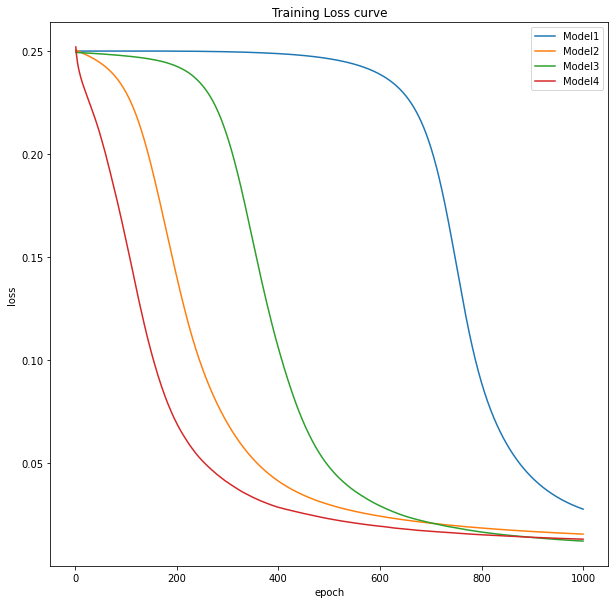

In [24]:
epochs = range(1, nb_epochs+1)

for mnum, mattr in model_result_attributes.items():
    plt.plot(epochs, mattr["epoch_loss"], label="Model" + str(mnum))

plt.title("Training Loss curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

# ToDo

3. Plot the graphs based on criteria ofActivation Function and Weight Initialisation type
4. Table the train and test accuracies and errors.
5. If easy, add option to use GPU
6. Write the conclusions we draw from the results.

# 5. Results
The results for the models are as follows:

| **Model Number** | **Activation** | **Loss**      | **Weight Initialisation** | **Training Accuracy** | **Testing Accuracy** |
|:----------------:|:--------------:|:-------------:|:-------------------------:|:---------------------:|:--------------------:|
| 1                | TanH           | MSE           | Uniform                   | 95.74%                | 93.98%               |
| 2                | TanH           | MSE           | Xavier                    | 99.52%                | 99.54%               |
| 3                | ReLU           | MSE           | Uniform                   | 99.72%                | 99.28%               |
| 4                | ReLU           | MSE           | kaiming                   | 99.75%                | 98.06%               |



In [47]:
learning_rate = 0.01
nb_epochs = 1000
mini_batch_size = 100

model_loss_plots={1:[],2:[],3:[],4:[]}
model_accuracies_train_plots={1:[],2:[],3:[],4:[]}
model_accuracies_test_plots={1:[],2:[],3:[],4:[]}

for iters in range(10):
        losses=[]
        accuracies=[]

        model = Sequential(Linear(2, 25), TanH(),
                     Linear(25, 25), TanH(),
                     Linear(25, 25), TanH(),
                     Linear(25, 25), TanH(),
                     Linear(25, 2), Sigmoid())


        model_loss = train_model(model, train_input, train_target, mseloss,
                                 learning_rate, mini_batch_size, nb_epochs)

        nb_train_errors = compute_nb_errors(model, train_input, train_target)
        nb_test_errors = compute_nb_errors(model, test_input, test_target)

        train_accuracy = (100 * (
            train_input.size(0)-nb_train_errors)) / train_input.size(0)

        test_accuracy = (100 * (
            test_input.size(0) - nb_test_errors)) / test_input.size(0)


        model_loss_plots[1].append(model_loss)
        model_accuracies_train_plots[1].append(train_accuracy)
        model_accuracies_test_plots[1].append(test_accuracy)



for iters in range(10):
        losses=[]
        accuracies=[]

        model = Sequential(Linear(2, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 25, weightsinit="xavier"), TanH(),
                     Linear(25, 2, weightsinit="xavier"), Sigmoid())


        model_loss = train_model(model, train_input, train_target, mseloss,
                                 learning_rate, mini_batch_size, nb_epochs)

        nb_train_errors = compute_nb_errors(model, train_input, train_target)
        nb_test_errors = compute_nb_errors(model, test_input, test_target)

        train_accuracy = (100 * (
            train_input.size(0)-nb_train_errors)) / train_input.size(0)

        test_accuracy = (100 * (
            test_input.size(0) - nb_test_errors)) / test_input.size(0)


        model_loss_plots[2].append(model_loss)
        model_accuracies_train_plots[2].append(train_accuracy)
        model_accuracies_test_plots[2].append(test_accuracy)


for iters in range(10):
        losses=[]
        accuracies=[]

        model = Sequential(Linear(2, 25), ReLU(),
                     Linear(25, 25), ReLU(),
                     Linear(25, 25), ReLU(),
                     Linear(25, 25), ReLU(),
                     Linear(25, 2), Sigmoid())


        model_loss = train_model(model, train_input, train_target, mseloss,
                                 learning_rate, mini_batch_size, nb_epochs)

        nb_train_errors = compute_nb_errors(model, train_input, train_target)
        nb_test_errors = compute_nb_errors(model, test_input, test_target)

        train_accuracy = (100 * (
            train_input.size(0)-nb_train_errors)) / train_input.size(0)

        test_accuracy = (100 * (
            test_input.size(0) - nb_test_errors)) / test_input.size(0)


        model_loss_plots[3].append(model_loss)
        model_accuracies_train_plots[3].append(train_accuracy)
        model_accuracies_test_plots[3].append(test_accuracy)

for iters in range(10):
        losses=[]
        accuracies=[]

        model = Sequential(Linear(2, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 25, weightsinit="kaiming"), ReLU(),
                      Linear(25, 2, weightsinit="kaiming"), Sigmoid())

        model_loss = train_model(model, train_input, train_target, mseloss,
                                 learning_rate, mini_batch_size, nb_epochs)

        nb_train_errors = compute_nb_errors(model, train_input, train_target)
        nb_test_errors = compute_nb_errors(model, test_input, test_target)

        train_accuracy = (100 * (
            train_input.size(0)-nb_train_errors)) / train_input.size(0)

        test_accuracy = (100 * (
            test_input.size(0) - nb_test_errors)) / test_input.size(0)


        model_loss_plots[4].append(model_loss)
        model_accuracies_train_plots[4].append(train_accuracy)
        model_accuracies_test_plots[4].append(test_accuracy)



Epoch 0 Training loss 0.24904222786426544
Epoch 100 Training loss 0.2482415735721588
Epoch 200 Training loss 0.24756261706352234
Epoch 300 Training loss 0.24682514369487762
Epoch 400 Training loss 0.2458118051290512
Epoch 500 Training loss 0.24417071044445038
Epoch 600 Training loss 0.2411632388830185
Epoch 700 Training loss 0.2344643473625183
Epoch 800 Training loss 0.20911914110183716
Epoch 900 Training loss 0.10184375941753387
Epoch 0 Training loss 0.2522044777870178
Epoch 100 Training loss 0.2502928376197815
Epoch 200 Training loss 0.24921868741512299
Epoch 300 Training loss 0.24832424521446228
Epoch 400 Training loss 0.24743705987930298
Epoch 500 Training loss 0.24643944203853607
Epoch 600 Training loss 0.24511724710464478
Epoch 700 Training loss 0.24298550188541412
Epoch 800 Training loss 0.23879526555538177
Epoch 900 Training loss 0.22737304866313934
Epoch 0 Training loss 0.25007912516593933
Epoch 100 Training loss 0.24783645570278168
Epoch 200 Training loss 0.24612119793891907


Epoch 900 Training loss 0.2306051403284073
Epoch 0 Training loss 0.2525573968887329
Epoch 100 Training loss 0.24941235780715942
Epoch 200 Training loss 0.2471369206905365
Epoch 300 Training loss 0.24385161697864532
Epoch 400 Training loss 0.23665469884872437
Epoch 500 Training loss 0.2089599221944809
Epoch 600 Training loss 0.09726729243993759
Epoch 700 Training loss 0.04144030064344406
Epoch 800 Training loss 0.02624537982046604
Epoch 900 Training loss 0.02045668661594391
Epoch 0 Training loss 0.24377141892910004
Epoch 100 Training loss 0.22022689878940582
Epoch 200 Training loss 0.15838779509067535
Epoch 300 Training loss 0.08128876984119415
Epoch 400 Training loss 0.04646977782249451
Epoch 500 Training loss 0.032220203429460526
Epoch 600 Training loss 0.02501979097723961
Epoch 700 Training loss 0.020908711478114128
Epoch 800 Training loss 0.01828383468091488
Epoch 900 Training loss 0.016446692869067192
Epoch 0 Training loss 0.2627309560775757
Epoch 100 Training loss 0.23462525010108

Epoch 600 Training loss 0.051372259855270386
Epoch 700 Training loss 0.033271972090005875
Epoch 800 Training loss 0.02378830872476101
Epoch 900 Training loss 0.018160570412874222
Epoch 0 Training loss 0.2498406171798706
Epoch 100 Training loss 0.24882368743419647
Epoch 200 Training loss 0.24682441353797913
Epoch 300 Training loss 0.23963958024978638
Epoch 400 Training loss 0.19044575095176697
Epoch 500 Training loss 0.0634072795510292
Epoch 600 Training loss 0.030359458178281784
Epoch 700 Training loss 0.021214308217167854
Epoch 800 Training loss 0.016516750678420067
Epoch 900 Training loss 0.01353013888001442
Epoch 0 Training loss 0.24979133903980255
Epoch 100 Training loss 0.24636363983154297
Epoch 200 Training loss 0.22754636406898499
Epoch 300 Training loss 0.15925659239292145
Epoch 400 Training loss 0.07158225774765015
Epoch 500 Training loss 0.03907807171344757
Epoch 600 Training loss 0.026524830609560013
Epoch 700 Training loss 0.0195758193731308
Epoch 800 Training loss 0.015579

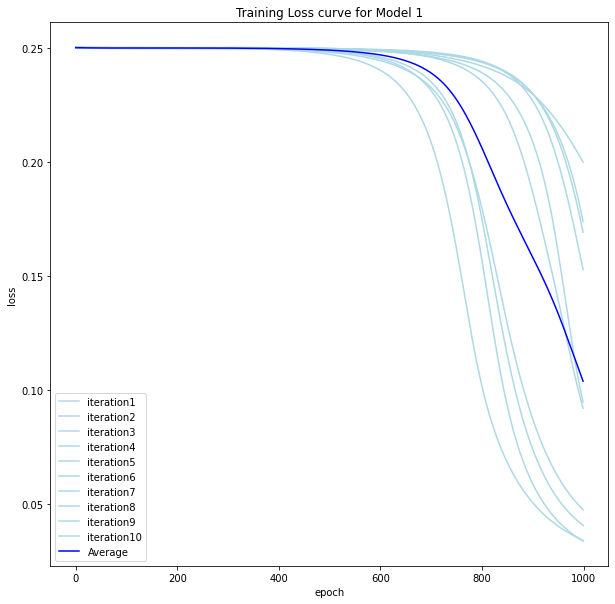

In [45]:
import numpy as np

vals=model_loss_plots[1]
c=1
for loss in vals:
    epochs=range(len(loss))
    plt.plot(epochs, loss, 'lightblue',label="iteration" + str(c))
    c+=1


a = np.array(vals)

res = np.average(a, axis=0)
plt.plot(epochs, res, 'blue',label="Average")
    
plt.title("Training Loss curve for Model 1")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()



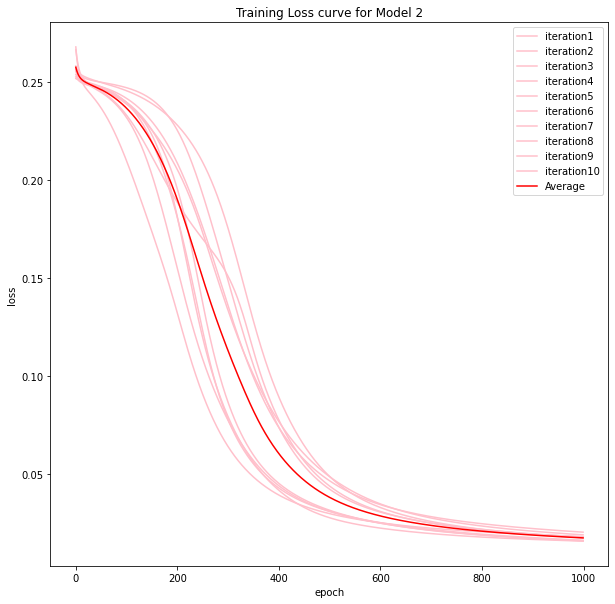

In [46]:
vals=model_loss_plots[2]
c=1
for loss in vals:
    epochs=range(len(loss))
    plt.plot(epochs, loss, 'pink',label="iteration" + str(c))
    c+=1


a = np.array(vals)

res = np.average(a, axis=0)
plt.plot(epochs, res, 'red',label="Average")
    
plt.title("Training Loss curve for Model 2")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

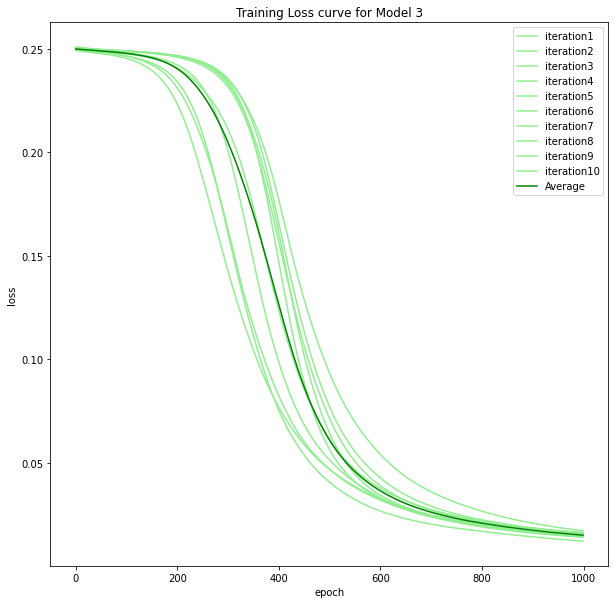

In [47]:
vals=model_loss_plots[3]
c=1
for loss in vals:
    epochs=range(len(loss))
    plt.plot(epochs, loss, 'lightgreen',label="iteration" + str(c))
    c+=1


a = np.array(vals)

res = np.average(a, axis=0)
plt.plot(epochs, res, 'green',label="Average")
    
plt.title("Training Loss curve for Model 3")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

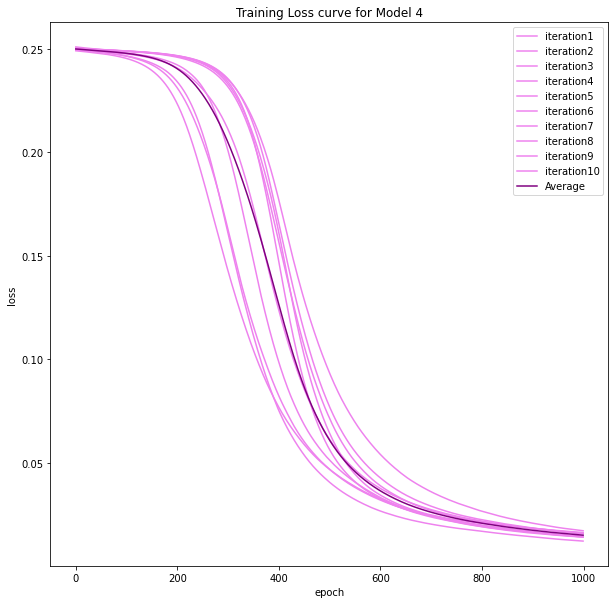

In [48]:
vals=model_loss_plots[3]
c=1
for loss in vals:
    epochs=range(len(loss))
    plt.plot(epochs, loss, 'violet',label="iteration" + str(c))
    c+=1


a = np.array(vals)

res = np.average(a, axis=0)
plt.plot(epochs, res, 'purple',label="Average")
    
plt.title("Training Loss curve for Model 4")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

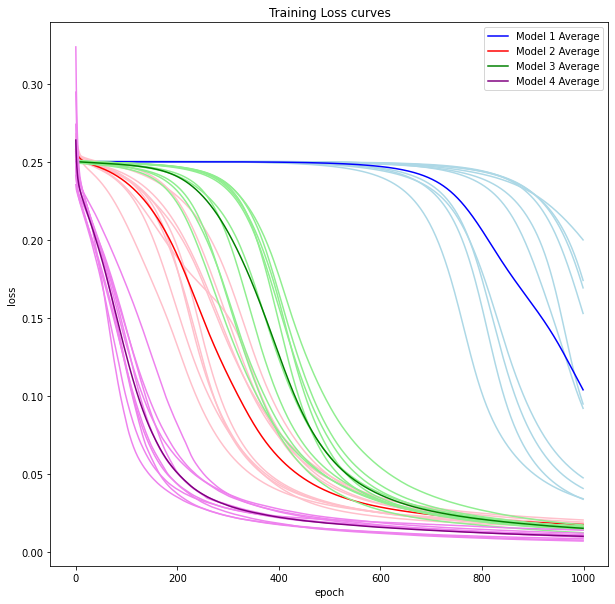

In [50]:
colors=[['lightblue','blue'],['pink','red'],['lightgreen','green'],['violet','purple']]
for i in range(1,5):
    vals=model_loss_plots[i]
    c=1
    for loss in vals:
        epochs=range(len(loss))
        plt.plot(epochs, loss, colors[i-1][0])
        c+=1


    a = np.array(vals)

    res = np.average(a, axis=0)
    plt.plot(epochs, res, colors[i-1][1],label="Model "+str(i)+" Average")

plt.title("Training Loss curves")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

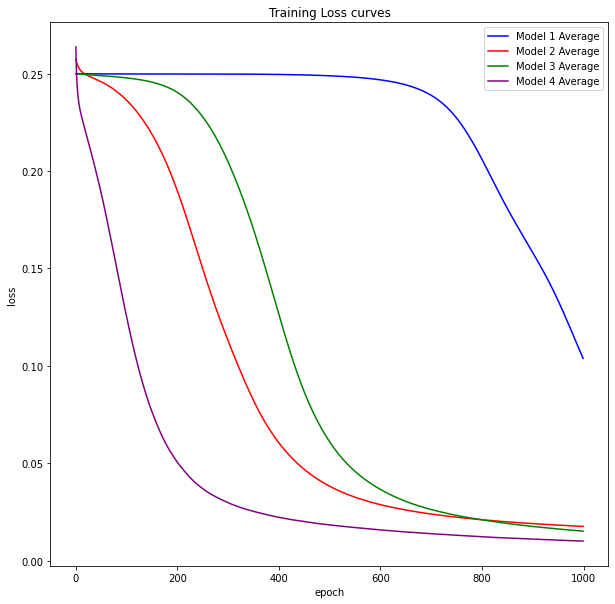

In [55]:
colors=[['lightblue','blue'],['pink','red'],['lightgreen','green'],['violet','purple']]
for i in range(1,5):
    vals=model_loss_plots[i]
    c=1
    a = np.array(vals)

    res = np.average(a, axis=0)
    plt.plot(epochs, res, colors[i-1][1],label="Model "+str(i)+" Average")

plt.title("Training Loss curves")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

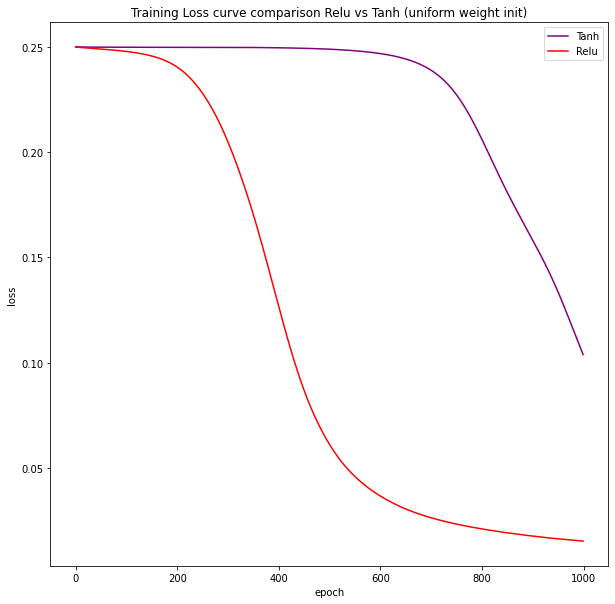

In [51]:
vals=model_loss_plots[1]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'purple',label="Tanh")

vals=model_loss_plots[3]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'red',label="Relu")

    
plt.title("Training Loss curve comparison Relu vs Tanh (uniform weight init)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

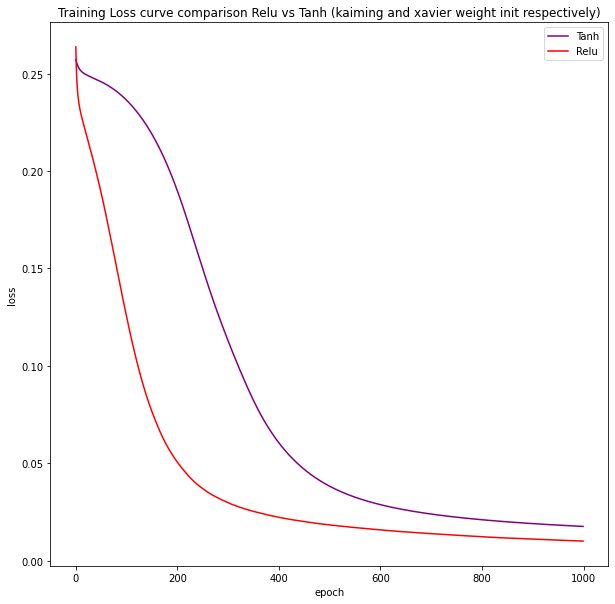

In [52]:
vals=model_loss_plots[2]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'purple',label="Tanh")

vals=model_loss_plots[4]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'red',label="Relu")

    
plt.title("Training Loss curve comparison Relu vs Tanh (kaiming and xavier weight init respectively)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

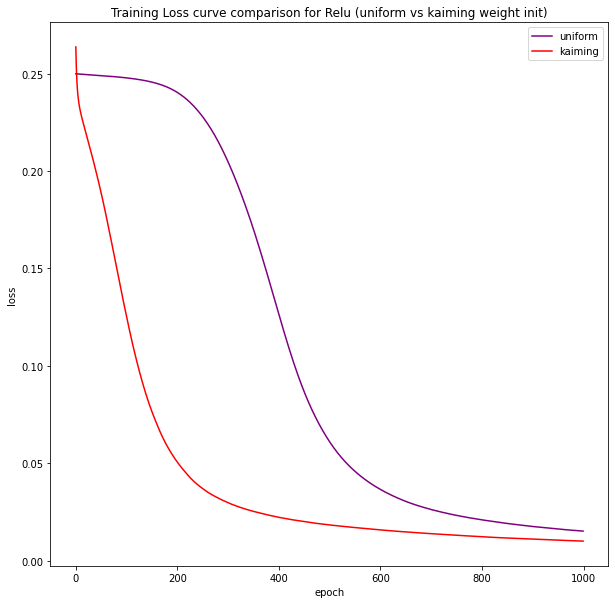

In [53]:
vals=model_loss_plots[3]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'purple',label="uniform")

vals=model_loss_plots[4]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'red',label="kaiming")

    
plt.title("Training Loss curve comparison for Relu (uniform vs kaiming weight init)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

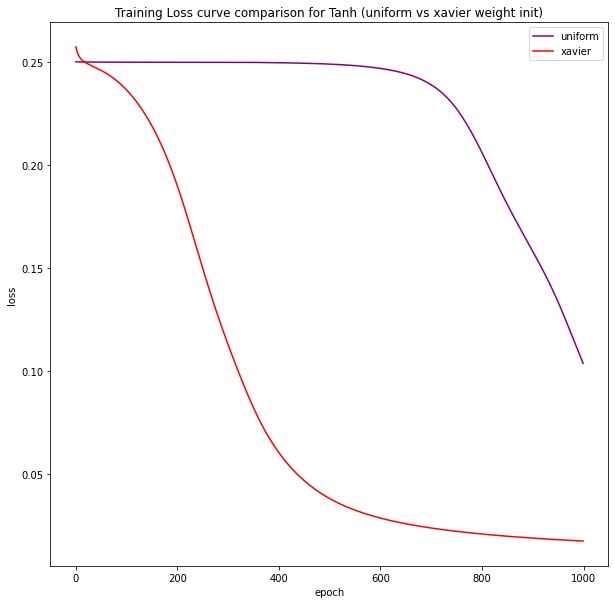

In [54]:
vals=model_loss_plots[1]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'purple',label="uniform")

vals=model_loss_plots[2]
a = np.array(vals)
res = np.average(a, axis=0)
plt.plot(epochs, res, 'red',label="xavier")

    
plt.title("Training Loss curve comparison for Tanh (uniform vs xavier weight init)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [71]:
print(len(model_loss_plots[4]))

10


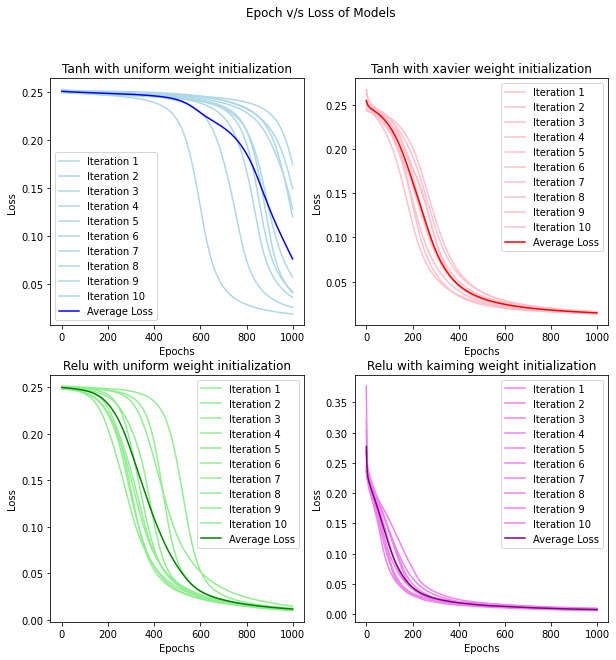

In [72]:
model_types_outputs=['Tanh with uniform weight initialization','Tanh with xavier weight initialization','Relu with uniform weight initialization','Relu with kaiming weight initialization']
colors=[['lightblue','blue'],['pink','red'],['lightgreen','green'],['violet','purple']]
import numpy as np

   
fig, ax = plt.subplots(nrows=2, ncols=2)
for train_out, subax, ind in zip(model_types_outputs, ax.flat,range(1,5)):
    title_part1 = train_out
    # plotting losses
    subax.set_title(title_part1)
    subax.set_xlabel("Epochs")
    subax.set_ylabel("Loss")
    plt.suptitle("Epoch v/s Loss of Models")
    epoch_loss_list = model_loss_plots[ind]
    title_part1
    for i in range(10):
        subax.plot(epoch_loss_list[i], colors[ind-1][0],label="Iteration {}".format(i+1))

    average_loss = np.mean(model_loss_plots[ind], axis=0)
    subax.plot(average_loss,colors[ind-1][1], label="Average Loss")
    subax.legend()

      1     2     3     4
0  98.1  99.6  99.6  99.7
1  93.1  99.4  99.7  99.8
2  99.0  99.7  99.8  99.8
3  90.8  99.6  99.8  99.5
4  90.8  99.7  99.9  99.8
5  99.0  99.5  99.5  99.7
6  97.7  99.4  99.7  99.9
7  98.6  99.4  99.8  99.8
8  97.1  99.6  99.8  99.8
9  93.2  99.3  99.6  99.7


Text(0.5, 1.0, 'Comparison of Model Train Accuracies')

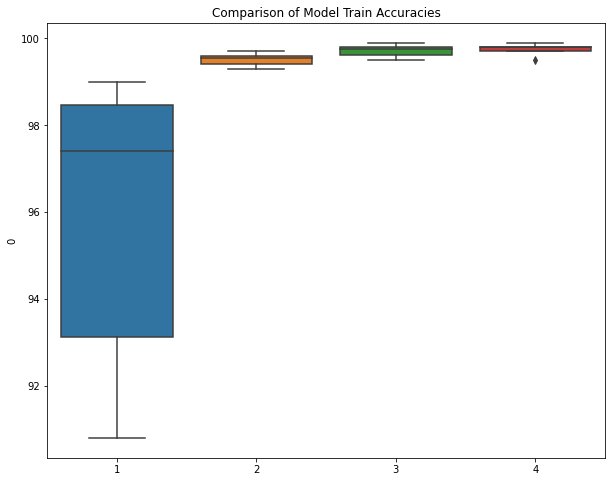

In [101]:
import pandas as pd
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)
# f, axes = plt.subplots(2, 2, sharey=True)

df = pd.DataFrame(model_accuracies_train_plots)
print(df)
unstacked = df.unstack().to_frame()
sns.boxplot(
    x=unstacked.index.get_level_values(0),
    y=unstacked[0]).set_title('Comparison of Model Train Accuracies')

In [102]:
print(df.mean())

1    95.74
2    99.52
3    99.72
4    99.75
dtype: float64


      1     2     3     4
0  97.8  99.8  99.0  99.4
1  79.6  99.8  99.2  99.2
2  99.4  99.2  99.8  99.4
3  85.0  99.4  98.8  99.2
4  92.0  99.8  99.6  98.6
5  99.2  99.4  98.8  99.0
6  97.0  99.8  98.8  99.0
7  98.4  99.4  99.6  98.8
8  97.2  99.4  99.4  99.0
9  94.2  99.4  99.8  99.0


Text(0.5, 1.0, 'Comparison of Model Test Accuracies')

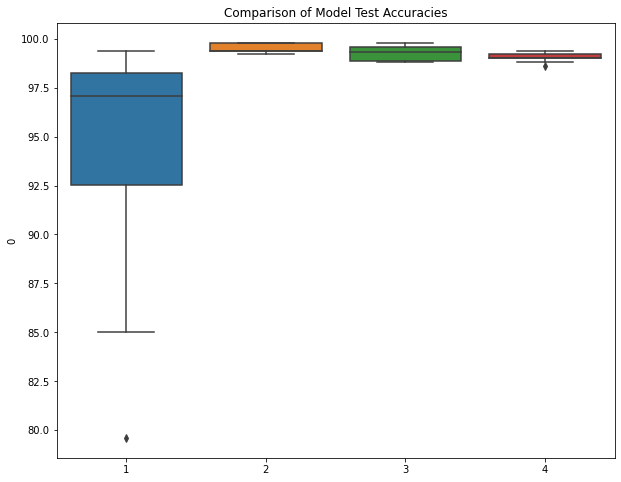

In [103]:
df = pd.DataFrame(model_accuracies_test_plots)
print(df)
unstacked = df.unstack().to_frame()
sns.boxplot(
    x=unstacked.index.get_level_values(0),
    y=unstacked[0]).set_title('Comparison of Model Test Accuracies')

In [104]:
print(df.mean())

1    93.98
2    99.54
3    99.28
4    99.06
dtype: float64
